<a href="https://colab.research.google.com/github/SachithPathiranage/TrueMortem/blob/Prediction-Model/TrueMortem_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# **Data Preprocessing**

In [ ]:
!ls 'drive/MyDrive/TrueMortem/Dataset- 741 Records.xlsx'

# Read the xlsx file
df = pd.read_excel('drive/MyDrive/TrueMortem/Dataset- 741 Records.xlsx')

df.head()

'drive/MyDrive/TrueMortem/Dataset- 741 Records.xlsx'


,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death
0,M,1.0,1.0,1.0,3.0,276.0,0.0,0.0,1.0,0.0,...,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,2.0,3.0,1.0,3.0,308.0,0.0,0.0,1.0,0.0,...,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,M,1.0,3.0,1.0,3.0,492.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,80.0,80.0,60.0,1.0,0.0,NaN,0.0
3,M,1.0,2.0,1.0,3.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,90.0,40.0,40.0,0.0,0.0,NaN,NaN
4,F,1.0,3.0,1.0,3.0,NaN,1.0,0.0,1.0,0.0,...,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
df.tail()

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death
736,F,2.0,3.0,1.0,3.0,382.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,80.0,80.0,60.0,0.0,0.0,2.0,1.0
737,M,1.0,3.0,1.0,3.0,568.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,80.0,60.0,40.0,1.0,0.0,2.0,0.0
738,F,2.0,2.0,1.0,3.0,252.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0
739,M,1.0,1.0,1.0,3.0,300.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0
740,M,1.0,2.0,1.0,3.0,354.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,80.0,90.0,60.0,1.0,0.0,2.0,1.0


In [ ]:
# Sanity check of Data
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 24 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Sex                                                                    732 non-null    object 
 1   Nourished                                                              702 non-null    float64
 2   Age- Old                                                               693 non-null    float64
 3   Chest cavity-Free air or adhesions                                     740 non-null    float64
 4   Pericardium-pericardial fluid - in ml                                  626 non-null    float64
 5   Heart-Size                                                             673 non-null    float64
 6   Heart-Size in configuration                                            715 non-null    flo

(741, 24)

In [ ]:
# Finding whether there are missing values
df.isnull().sum()   # No Missing values

,0
Sex,9
Nourished,39
Age- Old,48
Chest cavity-Free air or adhesions,1
Pericardium-pericardial fluid - in ml,115
Heart-Size,68
Heart-Size in configuration,26
Heart-Injuries,6
Heart-Normal myocardium,5
Heart-Recent ischaemic changes,5


In [ ]:
# Finding Duplicates
df.duplicated().sum()

38

In [ ]:
#Investigating these 35 duplicates
df[df.duplicated()]

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death
71,F,1.0,2.0,1.0,NaN,NaN,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,90.0,60.0,40.0,1.0,0.0,1.0,1.0
77,M,NaN,NaN,1.0,3.0,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,90.0,80.0,60.0,1.0,0.0,0.0,NaN
104,M,1.0,3.0,1.0,3.0,271.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,90.0,60.0,40.0,0.0,0.0,0.0,1.0
105,F,2.0,3.0,1.0,5.0,362.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,80.0,60.0,40.0,1.0,0.0,0.0,1.0
106,F,2.0,3.0,1.0,6.0,274.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107,M,1.0,3.0,1.0,3.0,310.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,90.0,80.0,60.0,0.0,0.0,0.0,0.0
108,M,1.0,3.0,1.0,3.0,582.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
109,M,NaN,NaN,1.0,NaN,567.0,NaN,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,F,NaN,1.0,1.0,3.0,183.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111,M,NaN,NaN,1.0,8.0,317.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Identifying garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***" * 10)

Sex
M     489
F     238
M       3
F       2
Name: count, dtype: int64
******************************


In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,489
F,238
M,3
F,2


# **Exploratory Data Analysis (EDA)**

In [ ]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nourished,702.0,1.618234,0.677419,1.0,1.0,2.0,2.0,3.0
Age- Old,693.0,2.551227,0.740480,1.0,2.0,3.0,3.0,3.0
Chest cavity-Free air or adhesions,740.0,0.710811,0.453693,0.0,0.0,1.0,1.0,1.0
Pericardium-pericardial fluid - in ml,626.0,9.140575,40.737396,2.0,3.0,3.0,5.0,620.0
Heart-Size,673.0,322.478455,93.410767,24.0,261.0,317.0,375.0,809.0
Heart-Size in configuration,715.0,0.300699,0.458883,0.0,0.0,0.0,1.0,1.0
Heart-Injuries,735.0,0.005442,0.073620,0.0,0.0,0.0,0.0,1.0
Heart-Normal myocardium,736.0,0.732337,0.443042,0.0,0.0,1.0,1.0,1.0
Heart-Recent ischaemic changes,736.0,0.240489,0.427671,0.0,0.0,0.0,0.0,1.0
Heart-Myocardial fibrosis present in,723.0,0.349931,0.557581,0.0,0.0,0.0,1.0,3.0


In [ ]:
# Descriptive statistics of object colomns
df.describe(include='object').T

,count,unique,top,freq
Sex,732,4,M,489


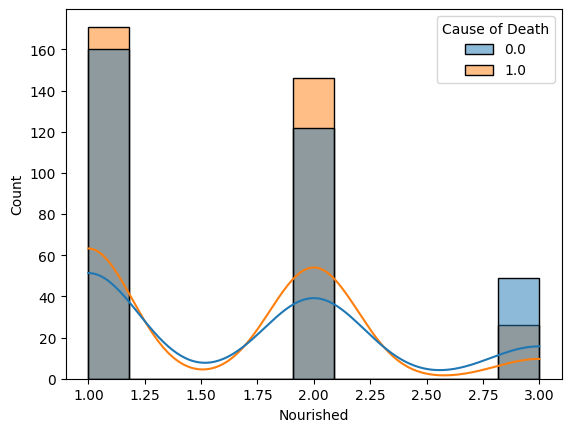

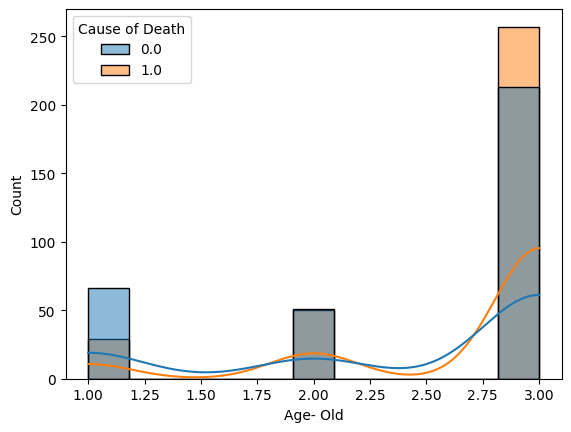

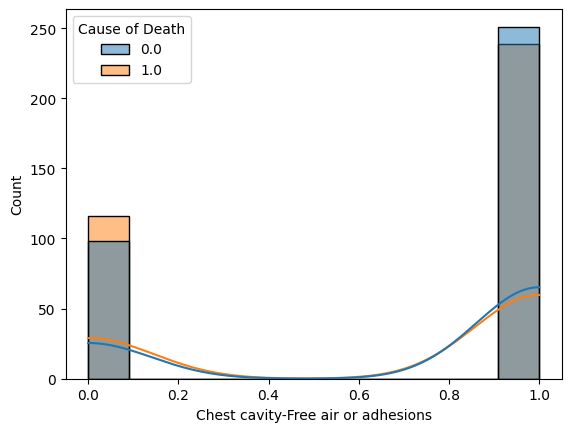

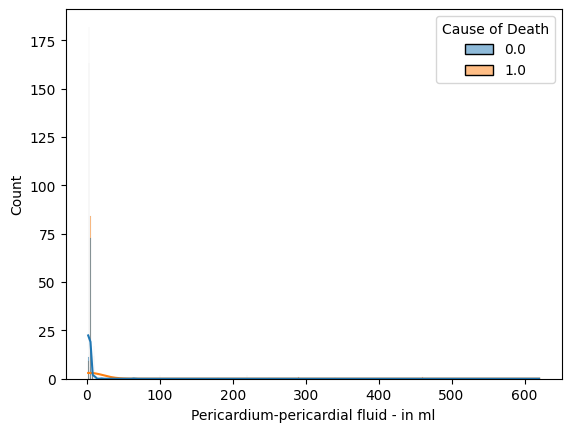

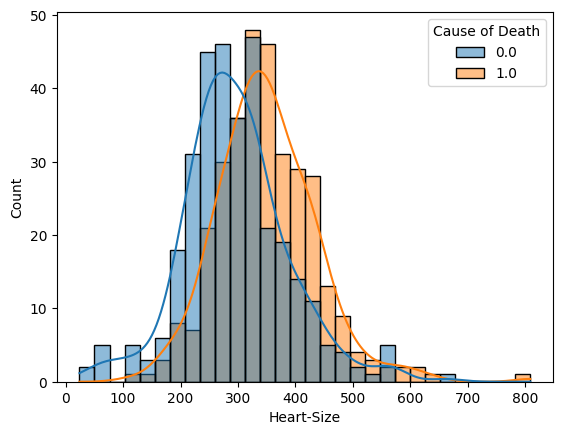

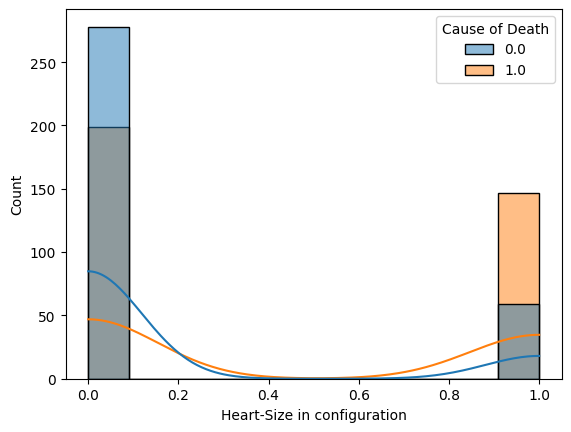

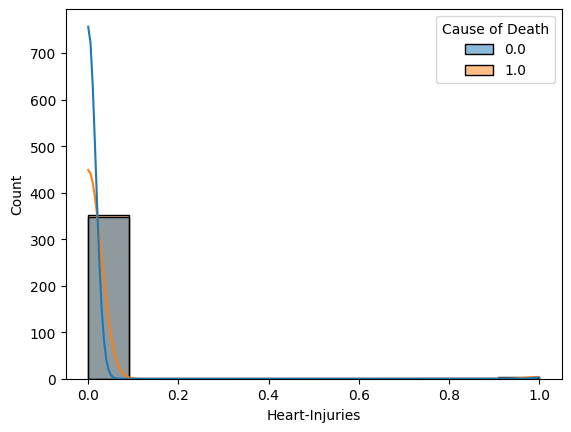

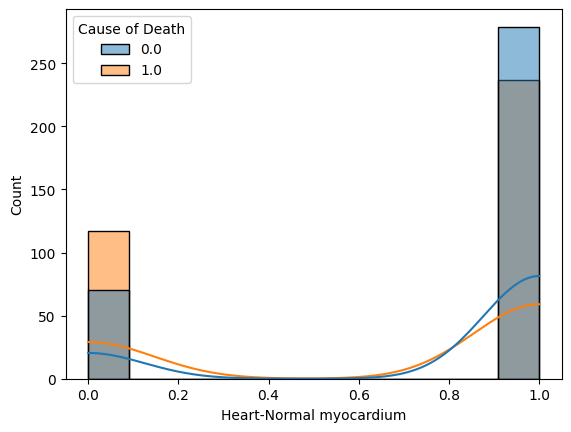

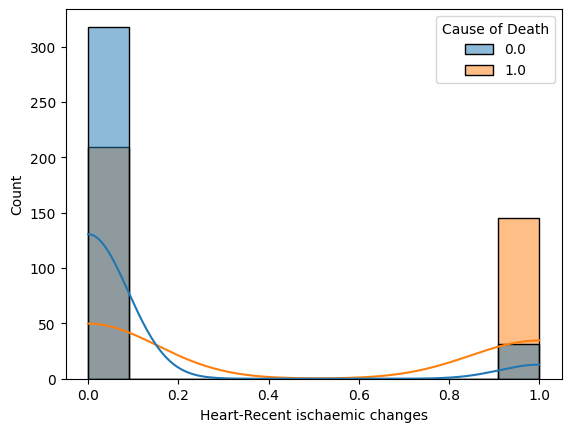

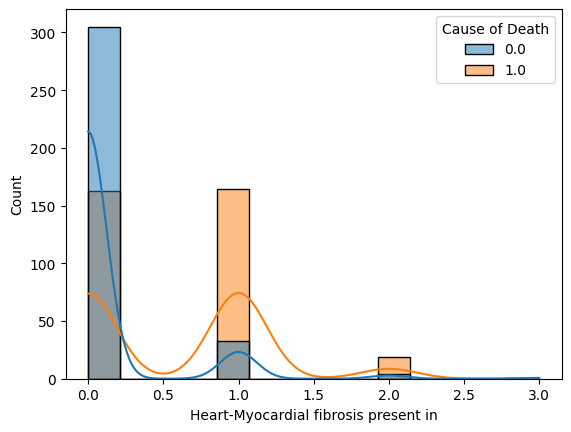

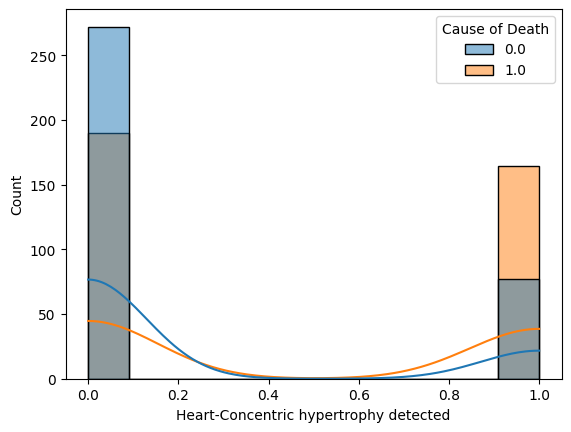

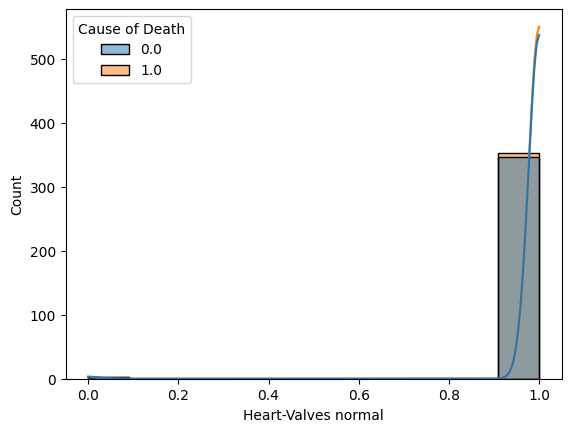

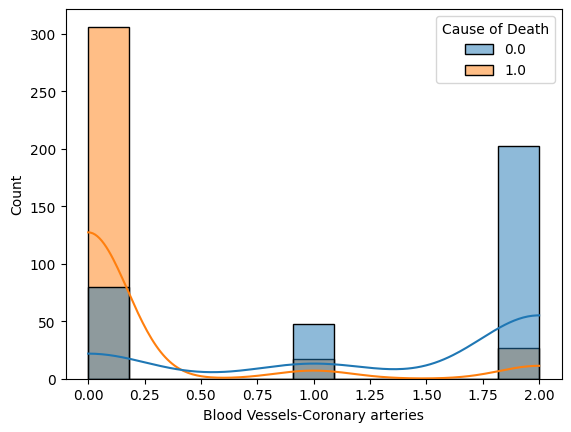

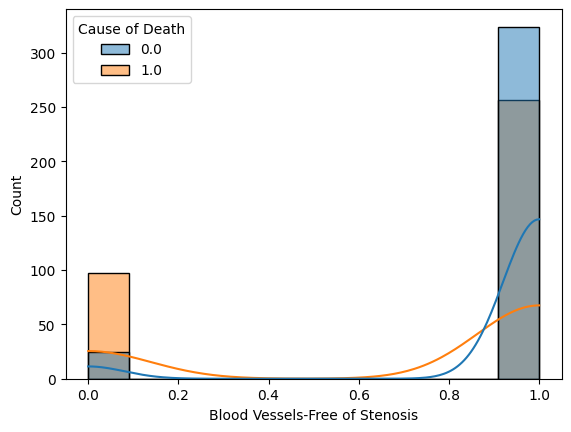

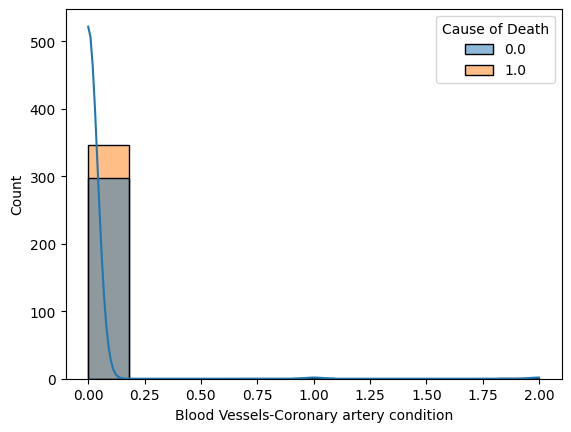

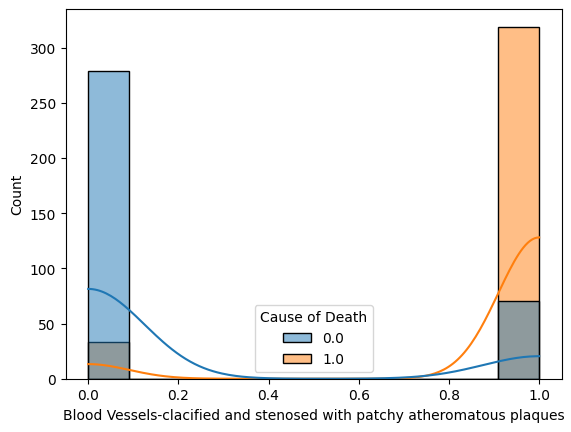

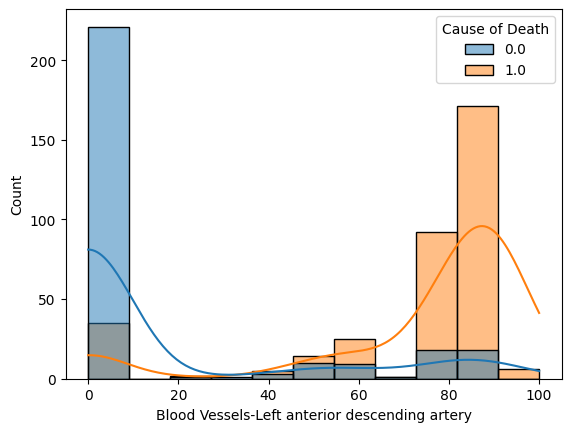

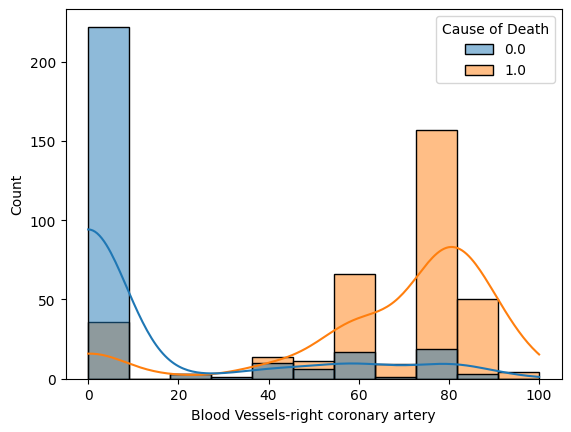

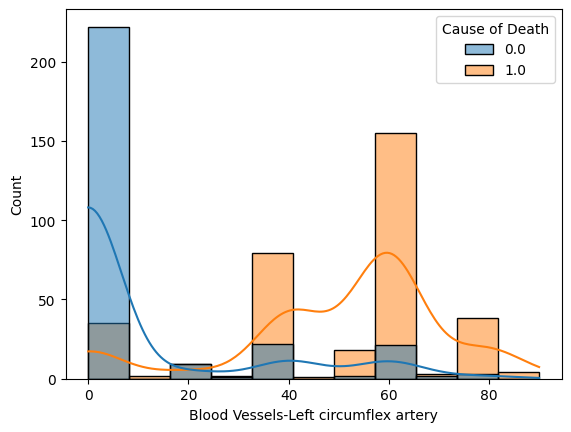

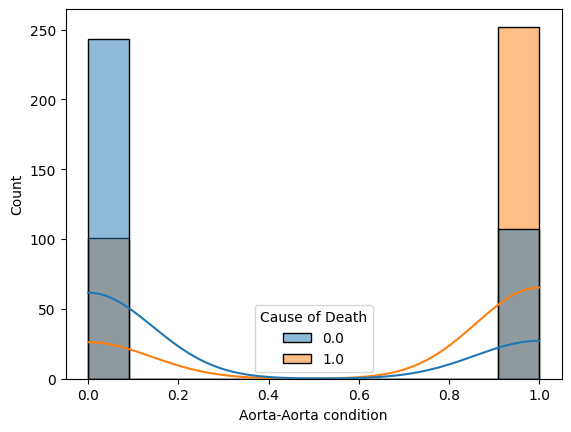

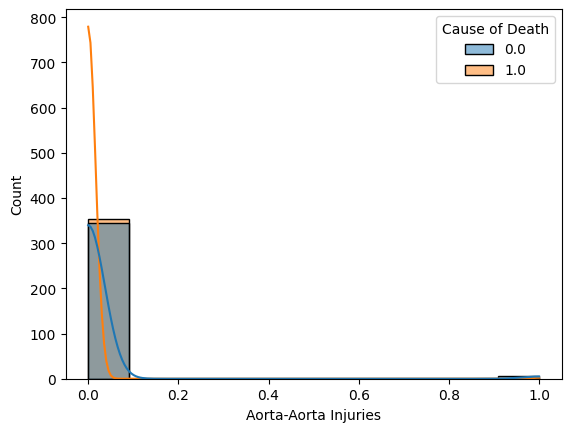

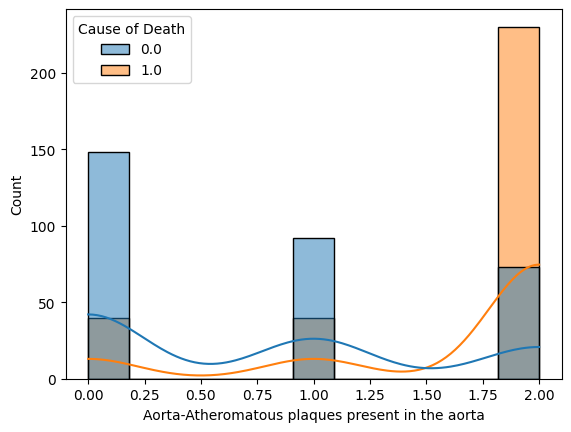

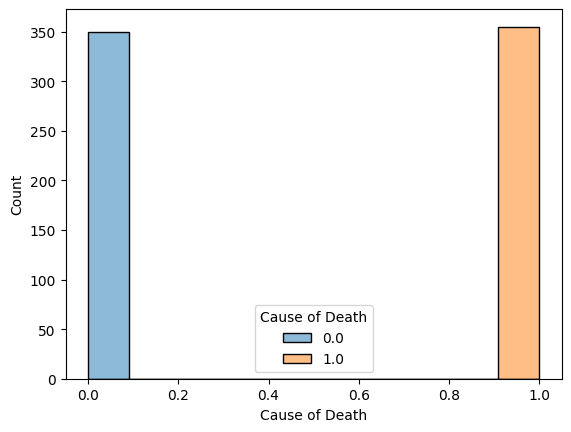

In [ ]:
# Histogram to understand the distribution
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data = df, x = i, kde=True, hue= "Cause of Death")
  plt.show()

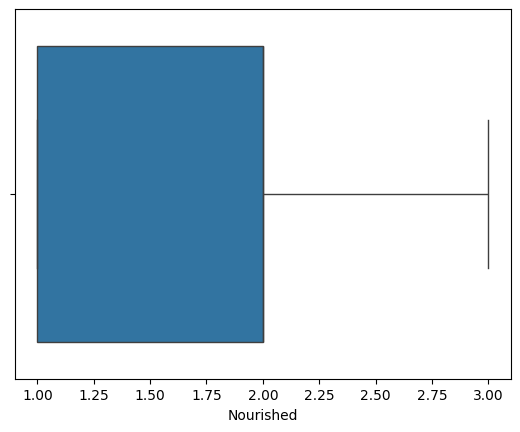

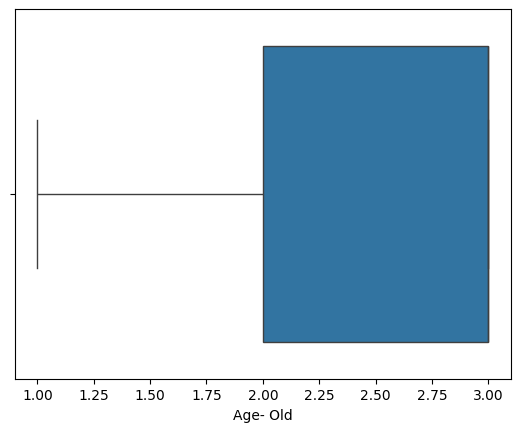

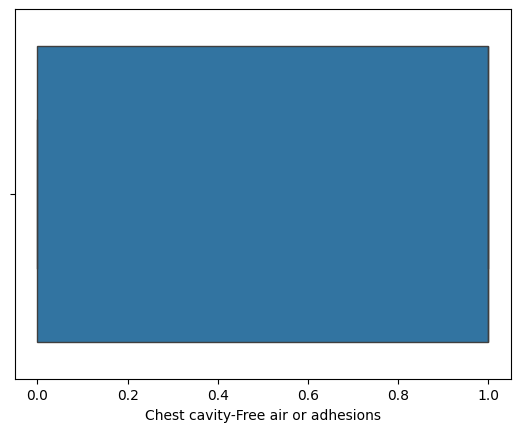

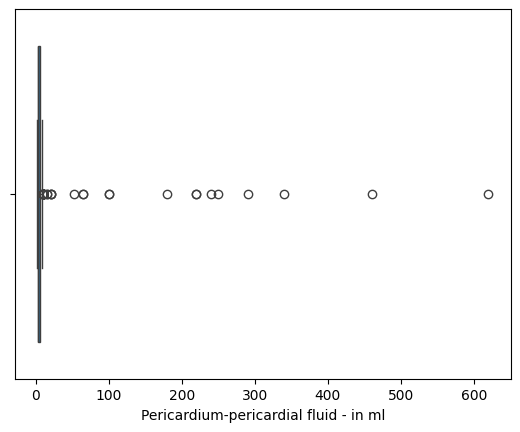

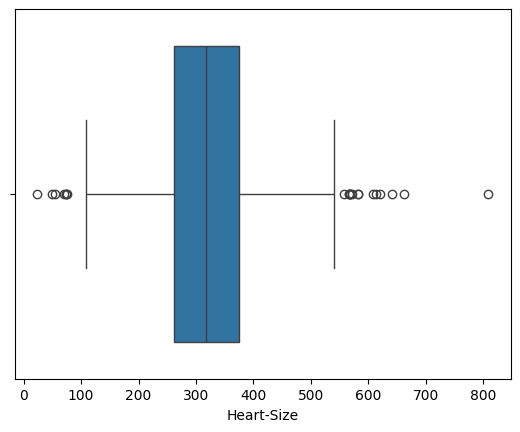

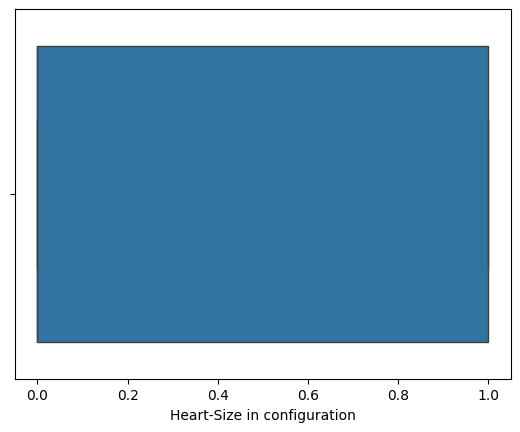

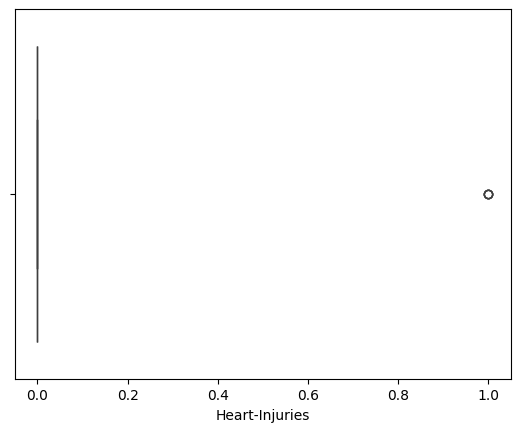

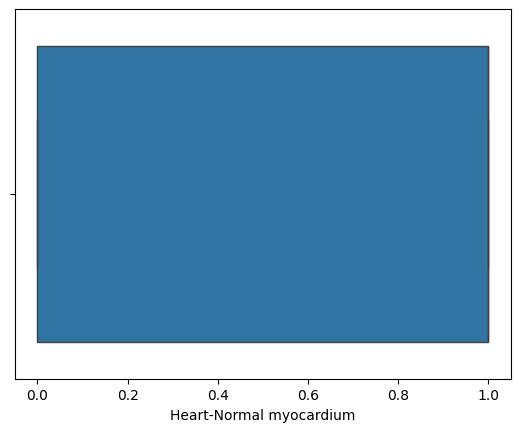

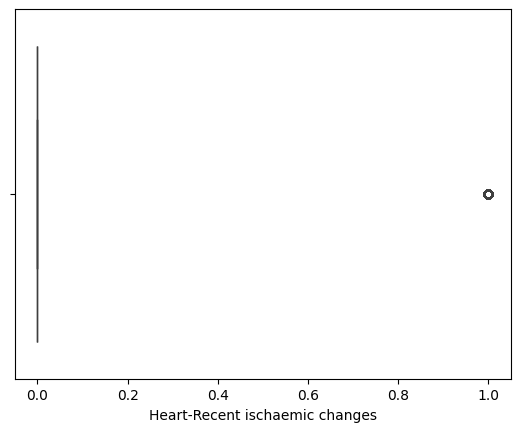

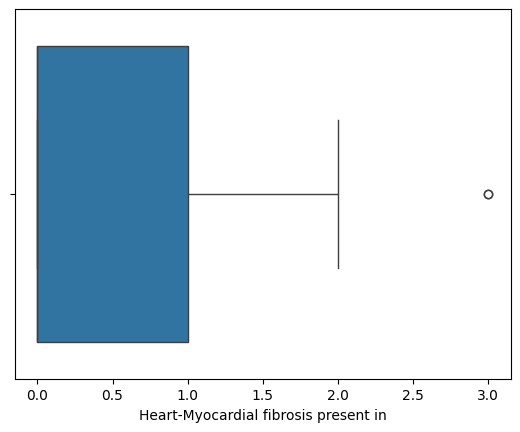

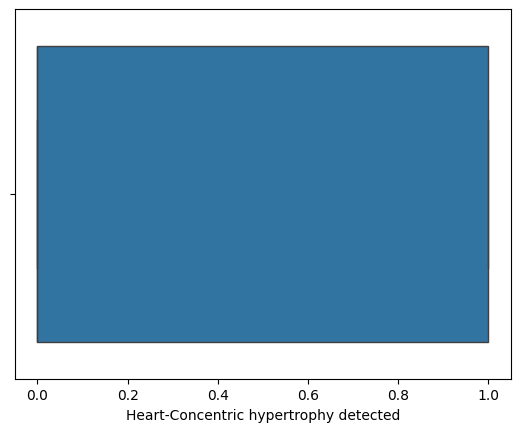

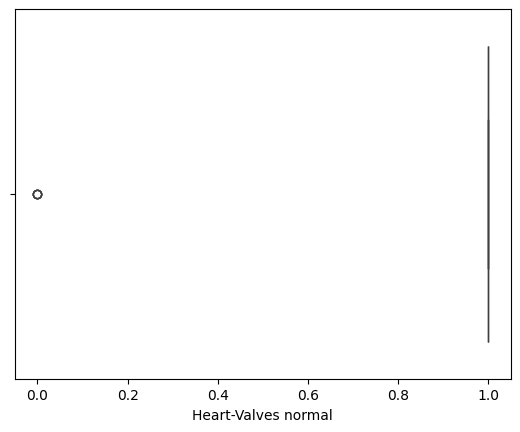

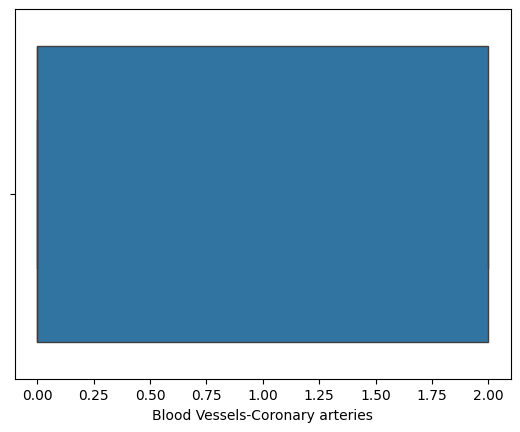

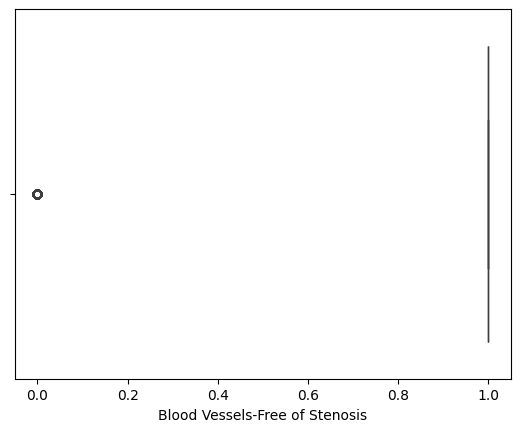

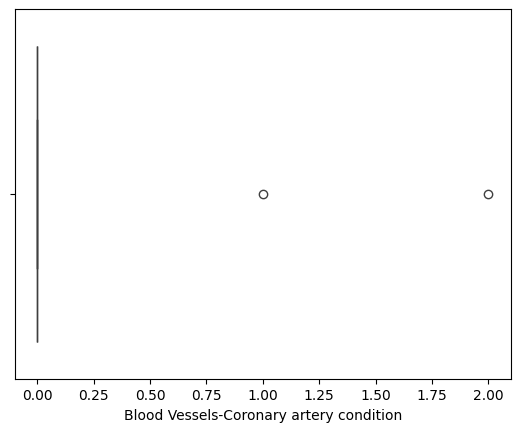

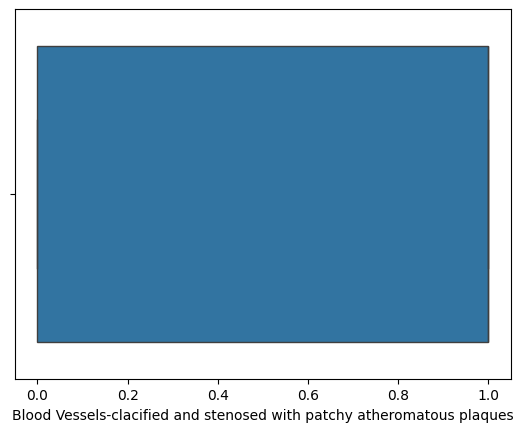

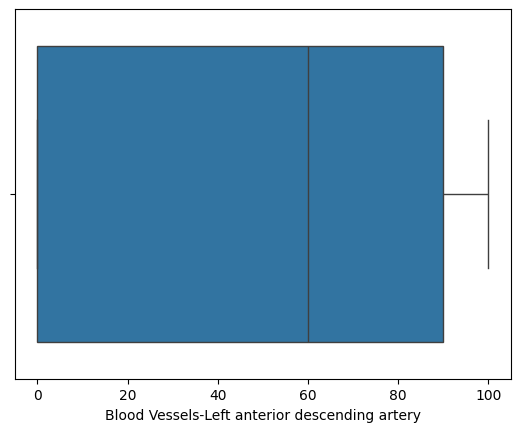

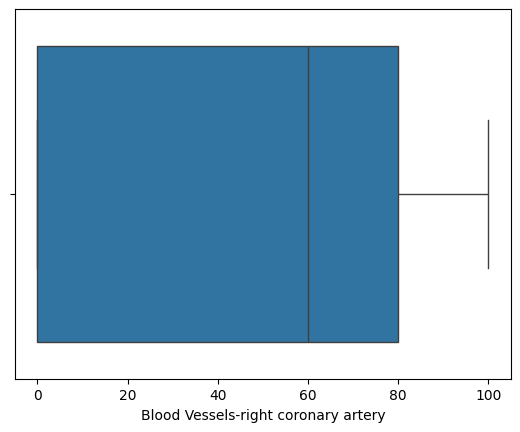

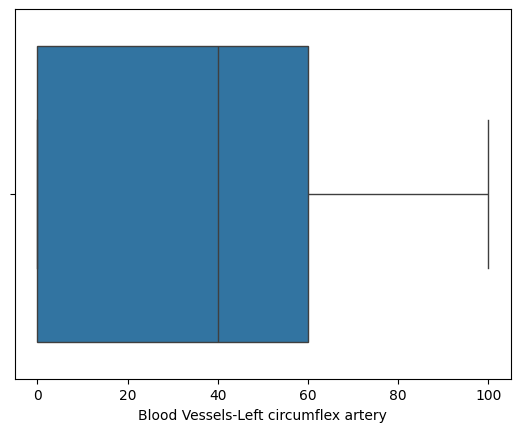

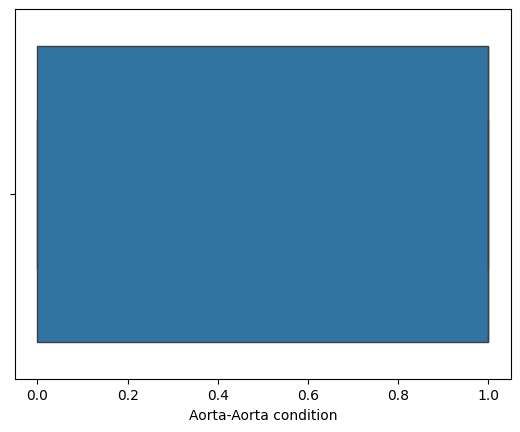

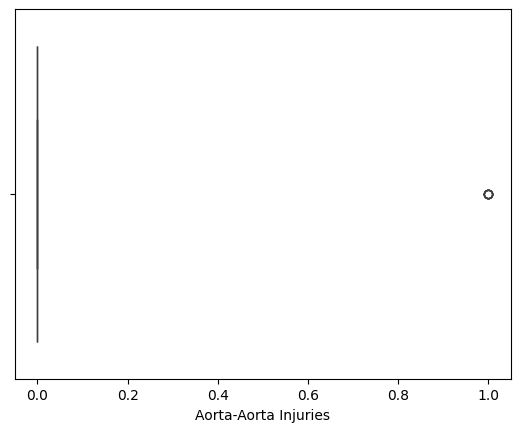

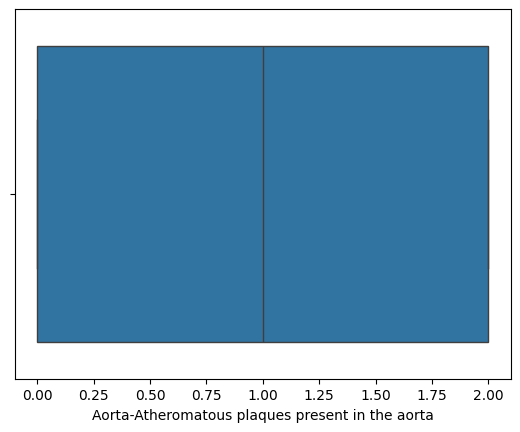

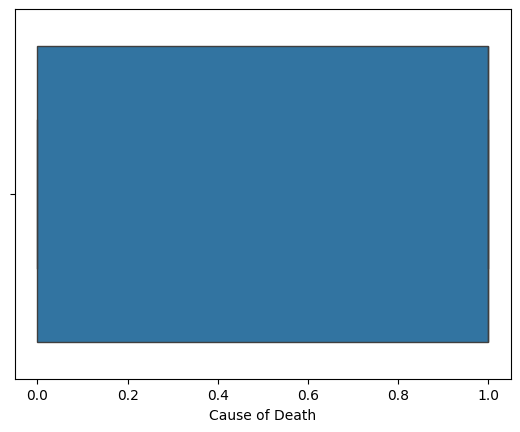

In [ ]:
# Boxplot to identify the Outliers in the dataset
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data = df, x = i)
  plt.show()

# **Missing Value Treatments**

In [ ]:
new_df = df.copy()

Remove Duplicates

In [ ]:
# Check for duplicate data
print("Duplicate values, before handling: ", new_df.duplicated().sum())

# If there are, handle duplicate valuse and garbage values
new_df = new_df.drop_duplicates()

# Check for duplicate data
print("Duplicate values, after handling: ", new_df.duplicated().sum())

Duplicate values, before handling:  38
Duplicate values, after handling:  0


In [ ]:
new_df[new_df.duplicated()]

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death


In [ ]:
# Remove the 'Cause of Death' null columns
new_df.dropna(subset=['Cause of Death'], inplace=True)

# check for null values in 'Cause of Death' column now
new_df['Cause of Death'].isnull().sum()

0

In [ ]:
new_df['Sex'].value_counts()

,count
Sex,
M,449
F,209
F,2
M,2


In [ ]:
new_df['Sex'] = new_df['Sex'].str.strip()

In [ ]:
new_df['Sex'].value_counts()

,count
Sex,
M,451
F,211


In [ ]:
# Mean, Median, Mode and KNNIputer
from sklearn.impute import KNNImputer

In [ ]:
new_df.isnull().sum()

,0
Sex,8
Nourished,25
Age- Old,33
Chest cavity-Free air or adhesions,1
Pericardium-pericardial fluid - in ml,104
Heart-Size,42
Heart-Size in configuration,19
Heart-Injuries,3
Heart-Normal myocardium,2
Heart-Recent ischaemic changes,2


In [ ]:
# Replace null values with the most frequent value for columns Sex, Nourished, Age-Old, Free air or adhesions, Size in configuration, Heart-Injuries, Normal myocardium, Valves, Blood Vessels-Free of Stenosis, Blood Vessels-clacified and stenosed with patchy atheromatous plaques
# Aorta-Aorta condition	, Aorta-Aorta Injuries
new_df['Sex'].fillna(new_df['Sex'].mode()[0], inplace=True)
new_df['Nourished'].fillna(new_df['Nourished'].mode()[0], inplace=True)
new_df['Age- Old'].fillna(new_df['Age- Old'].mode()[0], inplace=True)
new_df['Chest cavity-Free air or adhesions'].fillna(new_df['Chest cavity-Free air or adhesions'].mode()[0], inplace=True)
new_df['Heart-Size in configuration'].fillna(new_df['Heart-Size in configuration'].mode()[0], inplace=True)
new_df['Heart-Injuries'].fillna(new_df['Heart-Injuries'].mode()[0], inplace=True)
new_df['Heart-Normal myocardium'].fillna(new_df['Heart-Normal myocardium'].mode()[0], inplace=True)
new_df['Heart-Valves normal'].fillna(new_df['Heart-Valves normal'].mode()[0], inplace=True)
new_df['Blood Vessels-Free of Stenosis'].fillna(new_df['Blood Vessels-Free of Stenosis'].mode()[0], inplace=True)
new_df['Blood Vessels-clacified and stenosed with patchy atheromatous plaques'].fillna(new_df['Blood Vessels-clacified and stenosed with patchy atheromatous plaques'].mode()[0], inplace=True)
new_df['Aorta-Aorta condition'].fillna(new_df['Aorta-Aorta condition'].mode()[0], inplace=True)
new_df['Aorta-Aorta Injuries'].fillna(new_df['Aorta-Aorta Injuries'].mode()[0], inplace=True)

# Use the mean or median value for columns Heart Size, Pericardial fluid
# For Heart-Size, the code calculates the mean within groups defined by 'Heart-Size in configuration', then fills the missing values in those column with their respective group means.
new_df['Heart-Size'] = new_df.groupby('Heart-Size in configuration')['Heart-Size'].transform(lambda x: x.fillna(x.mean()))

new_df['Pericardium-pericardial fluid - in ml'].fillna(new_df['Pericardium-pericardial fluid - in ml'].mean(), inplace=True)


# List of value columns to fill with 0
value_columns_to_fill = ['Blood Vessels-Left anterior descending artery', 'Blood Vessels-right coronary artery', 'Blood Vessels-Left circumflex artery']

# Loop through each column to fill
for col in value_columns_to_fill:
    # Fill rows where 'Cause of Death' == 0 and the column has a null value
    new_df.loc[(new_df['Cause of Death'] == 0) & (new_df[col].isnull()), col] = 0

    # Fill rows where 'Cause of Death' == 1 and the column has a null value
    mean_value = new_df[col].mean(skipna=True)  # Calculate the mean excluding NaNs
    new_df.loc[(new_df['Cause of Death'] == 1) & (new_df[col].isnull()), col] = mean_value

# List of category columns to fill with 0
category_columns_to_fill = ['Heart-Recent ischaemic changes','Heart-Myocardial fibrosis present in','Heart-Concentric hypertrophy detected','Aorta-Atheromatous plaques present in the aorta','Blood Vessels-Coronary arteries','Blood Vessels-Coronary artery condition']

# Loop through each column to fill
for col in category_columns_to_fill:
    # Fill rows where 'Cause of Death' == 0 and the column has a null value
    new_df.loc[(new_df['Cause of Death'] == 0) & (new_df[col].isnull()), col] = 0

    # Fill rows where 'Cause of Death' == 1 and the column has a null value
    mode_value = new_df[col].mode()[0]  # Calculate the mode excluding NaNs
    new_df.loc[(new_df['Cause of Death'] == 1) & (new_df[col].isnull()), col] = mode_value



<ipython-input-34-000e891f7b81>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['Sex'].fillna(new_df['Sex'].mode()[0], inplace=True)
<ipython-input-34-000e891f7b81>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
new_df.isnull().sum()

,0
Sex,0
Nourished,0
Age- Old,0
Chest cavity-Free air or adhesions,0
Pericardium-pericardial fluid - in ml,0
Heart-Size,0
Heart-Size in configuration,0
Heart-Injuries,0
Heart-Normal myocardium,0
Heart-Recent ischaemic changes,0


# **Encoding of Data**

In [ ]:
# Label Encoding Categorical Features
# Identify categorical columns

categorical_cols = new_df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Sex'], dtype='object')


In [ ]:
# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le  # Save the encoder for future use (e.g., inverse_transform)

In [ ]:
categorical_cols = new_df.select_dtypes(include=['object']).columns
print(categorical_cols)


for label, encoded_value in zip(label_encoders['Sex'].classes_, label_encoders['Sex'].transform(label_encoders['Sex'].classes_)):
    print(f"{label}: {encoded_value}")  # Print label and encoded value together


Index([], dtype='object')
F: 0
M: 1


# **Correlation Analysis using Heatmap**

In [ ]:
new_df.corr()

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,...,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Blood Vessels-Left anterior descending artery,Blood Vessels-right coronary artery,Blood Vessels-Left circumflex artery,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta,Cause of Death
Sex,1.000000,-2.019985e-01,-0.151682,-0.037175,-0.024814,0.199394,0.082820,0.010833,0.067515,0.028392,...,0.014567,-0.076551,0.019711,0.038644,0.023310,0.041612,-0.028703,-1.588186e-02,-0.020383,0.032616
Nourished,-0.201999,1.000000e+00,0.192478,-0.017086,-0.051890,-0.301665,-0.163438,0.017235,0.029953,-0.038574,...,0.056359,0.056431,-0.025883,-0.040216,-0.017245,-0.032832,0.063803,-3.791257e-19,0.083788,-0.061967
Age- Old,-0.151682,1.924781e-01,1.000000,-0.062977,-0.042559,0.119348,0.075998,-0.036036,0.014291,0.015306,...,-0.103662,-0.018105,0.194705,0.205885,0.199142,0.176637,0.267285,-7.053711e-02,0.388492,0.156396
Chest cavity-Free air or adhesions,-0.037175,-1.708611e-02,-0.062977,1.000000,0.053153,0.029154,0.011280,0.011536,-0.025223,-0.083572,...,-0.284618,0.035556,0.004741,-0.024486,-0.015765,-0.029955,-0.024931,2.220623e-02,-0.123258,-0.047402
Pericardium-pericardial fluid - in ml,-0.024814,-5.189046e-02,-0.042559,0.053153,1.000000,0.044743,0.017392,-0.011742,-0.002335,0.040101,...,-0.051270,-0.006282,0.046308,0.056220,0.043840,0.049646,0.050966,-1.141612e-02,0.006517,0.110750
Heart-Size,0.199394,-3.016649e-01,0.119348,0.029154,0.044743,1.000000,0.611598,-0.011024,-0.083698,0.181268,...,-0.077455,-0.061431,0.220916,0.226144,0.219411,0.244038,0.169288,-1.440246e-02,0.209316,0.287653
Heart-Size in configuration,0.082820,-1.634376e-01,0.075998,0.011280,0.017392,0.611598,1.000000,-0.007246,-0.039549,0.172896,...,-0.063233,-0.033375,0.181427,0.199170,0.210279,0.215536,0.166327,-5.575875e-02,0.185045,0.272584
Heart-Injuries,0.010833,1.723511e-02,-0.036036,0.011536,-0.011742,-0.011024,-0.007246,1.000000,-0.084157,0.087948,...,-0.018334,-0.004022,0.029042,0.040314,0.049186,0.055058,-0.003706,-6.719966e-03,-0.018489,0.037597
Heart-Normal myocardium,0.067515,2.995345e-02,0.014291,-0.025223,-0.002335,-0.083698,-0.039549,-0.084157,1.000000,-0.471571,...,0.134260,-0.007573,-0.125270,-0.117470,-0.134312,-0.164585,-0.085634,1.343067e-02,-0.072983,-0.145860
Heart-Recent ischaemic changes,0.028392,-3.857405e-02,0.015306,-0.083572,0.040101,0.181268,0.172896,0.087948,-0.471571,1.000000,...,0.026151,-0.030383,0.348818,0.381803,0.381194,0.396963,0.229054,-1.098317e-02,0.232907,0.378144


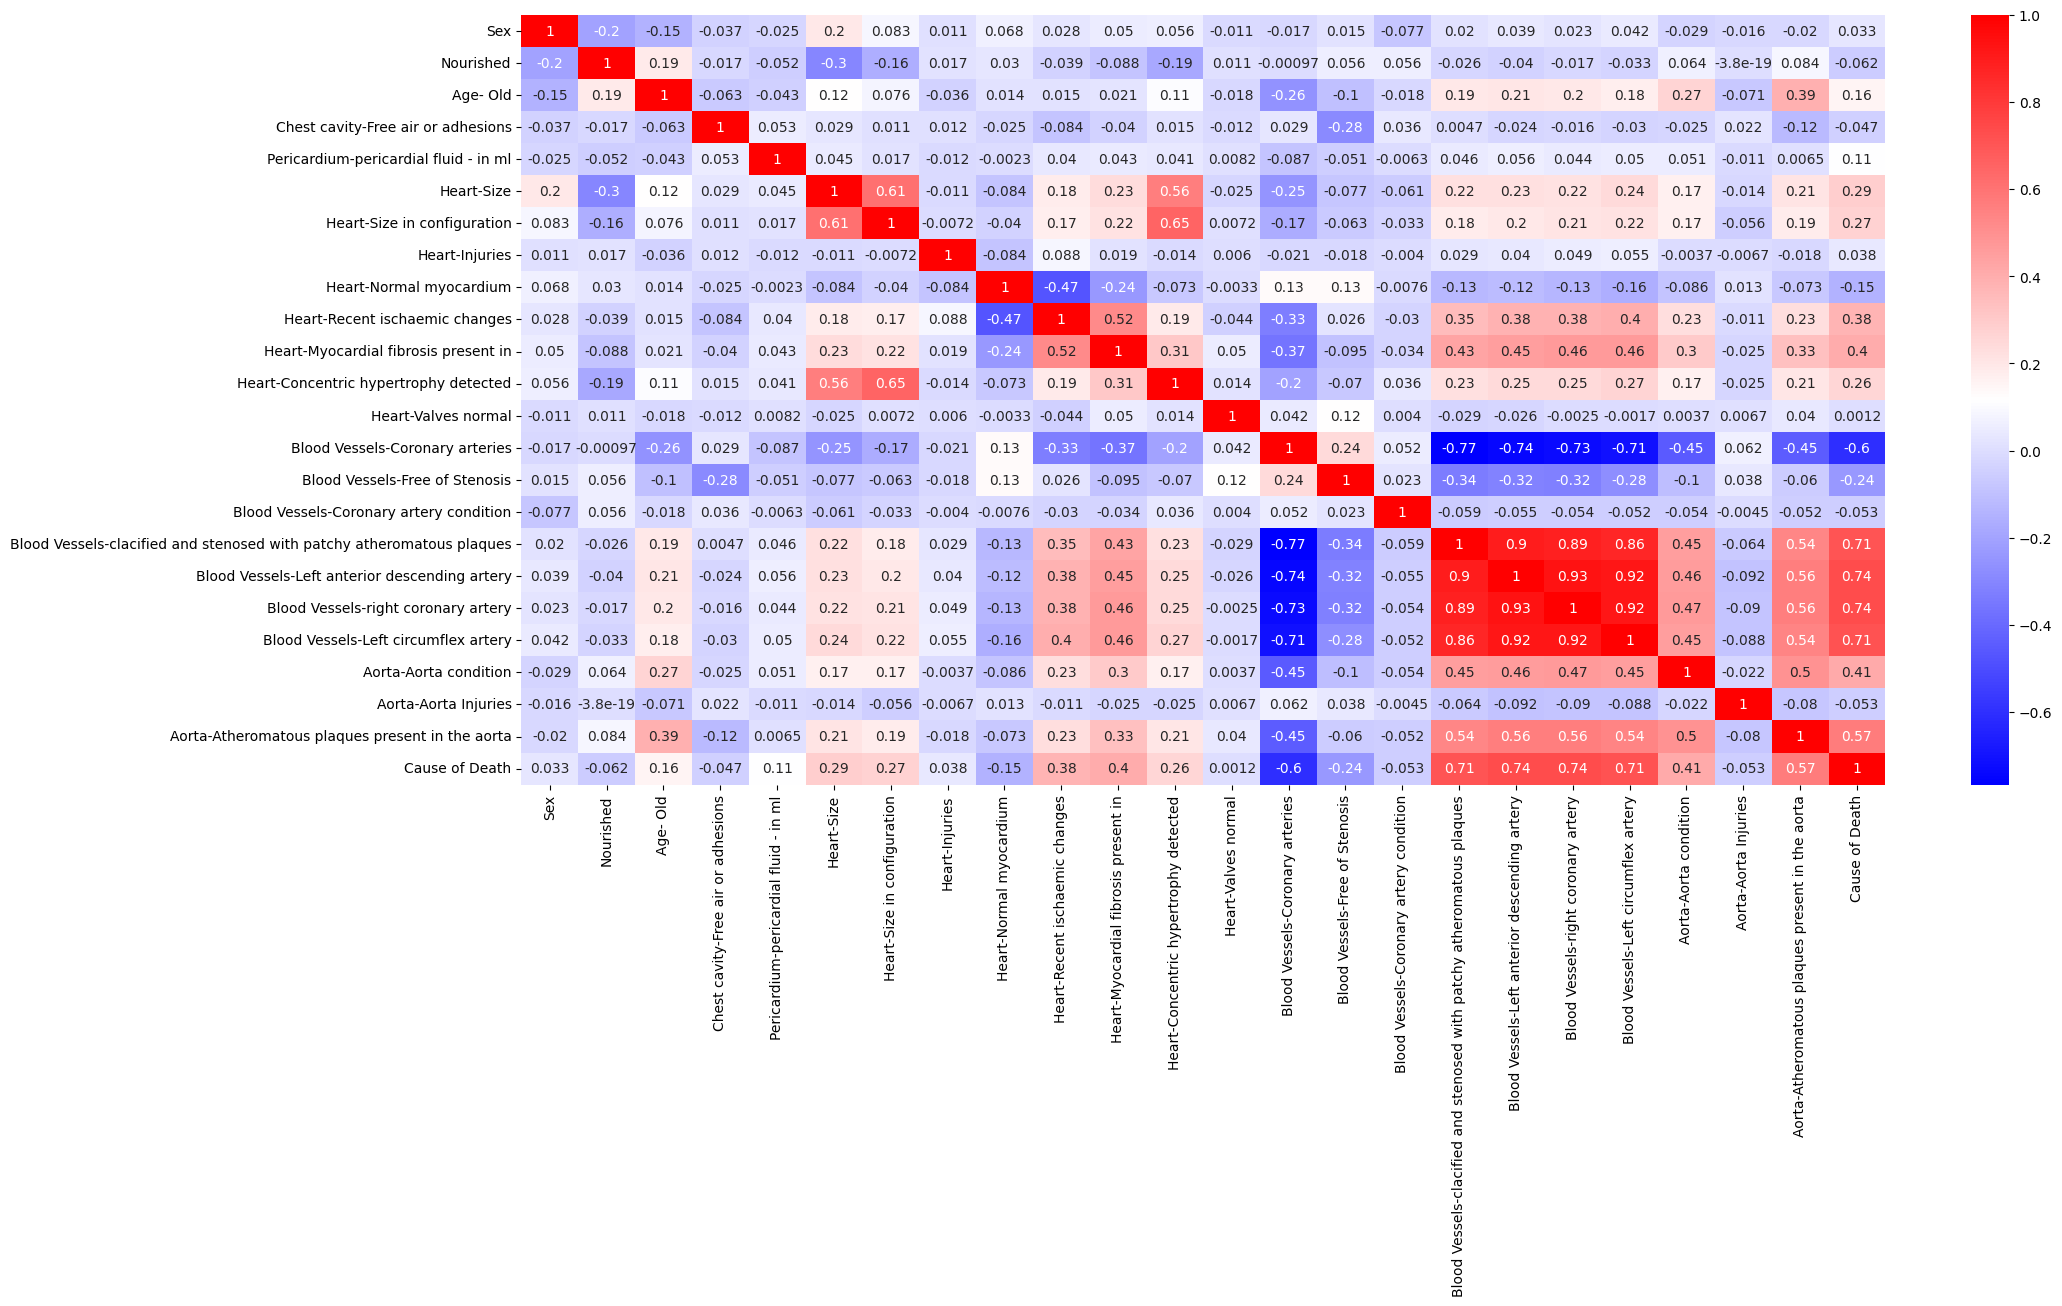

In [ ]:
plt.figure(figsize=(22,10))
sns.heatmap(new_df.corr(), cmap='bwr', annot=True)
plt.show()

# **Model building - Random Forest Classifier**

In [ ]:
# Example: Split into features (X) and target (y)
X = new_df.drop(columns=["Cause of Death"])  # Exclude target
y = new_df["Cause of Death"]  # Target variable

# Calculate correlation matrix for features only
corr_matrix = X.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation higher than the threshold (e.g., 0.8)
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop highly correlated features from the feature set
X_reduced = X.drop(columns=to_drop)

# If needed, combine reduced features with the target
df_reduced = pd.concat([X_reduced, y], axis=1)

# Output the result
print("Dropped features:", to_drop)
print("Reduced dataset shape:", df_reduced.shape)

Dropped features: ['Blood Vessels-Left anterior descending artery', 'Blood Vessels-right coronary artery', 'Blood Vessels-Left circumflex artery']
Reduced dataset shape: (670, 21)


In [ ]:
# Standardisation
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_reduced)

In [ ]:
X_reduced.head()

,Sex,Nourished,Age- Old,Chest cavity-Free air or adhesions,Pericardium-pericardial fluid - in ml,Heart-Size,Heart-Size in configuration,Heart-Injuries,Heart-Normal myocardium,Heart-Recent ischaemic changes,Heart-Myocardial fibrosis present in,Heart-Concentric hypertrophy detected,Heart-Valves normal,Blood Vessels-Coronary arteries,Blood Vessels-Free of Stenosis,Blood Vessels-Coronary artery condition,Blood Vessels-clacified and stenosed with patchy atheromatous plaques,Aorta-Aorta condition,Aorta-Aorta Injuries,Aorta-Atheromatous plaques present in the aorta
0,1,1.0,1.0,1.0,3.0,276.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,3.0,1.0,3.0,492.000000,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,1,3.0,3.0,1.0,3.0,288.638581,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
6,1,1.0,3.0,1.0,10.0,411.067797,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
7,1,1.0,1.0,1.0,3.0,288.638581,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on both training and testing
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)*100
print(f"Training Accuracy: {train_accuracy}")
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Evaluate on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)*100
print(f"Testing Accuracy: {test_accuracy}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test,y_test_pred))

Training Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       267
         1.0       1.00      1.00      1.00       269

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

Testing Accuracy: 84.32835820895522
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83        63
         1.0       0.86      0.85      0.85        71

    accuracy                           0.84       134
   macro avg       0.84      0.84      0.84       134
weighted avg       0.84      0.84      0.84       134

Confusion Matrix:
 [[53 10]
 [11 60]]


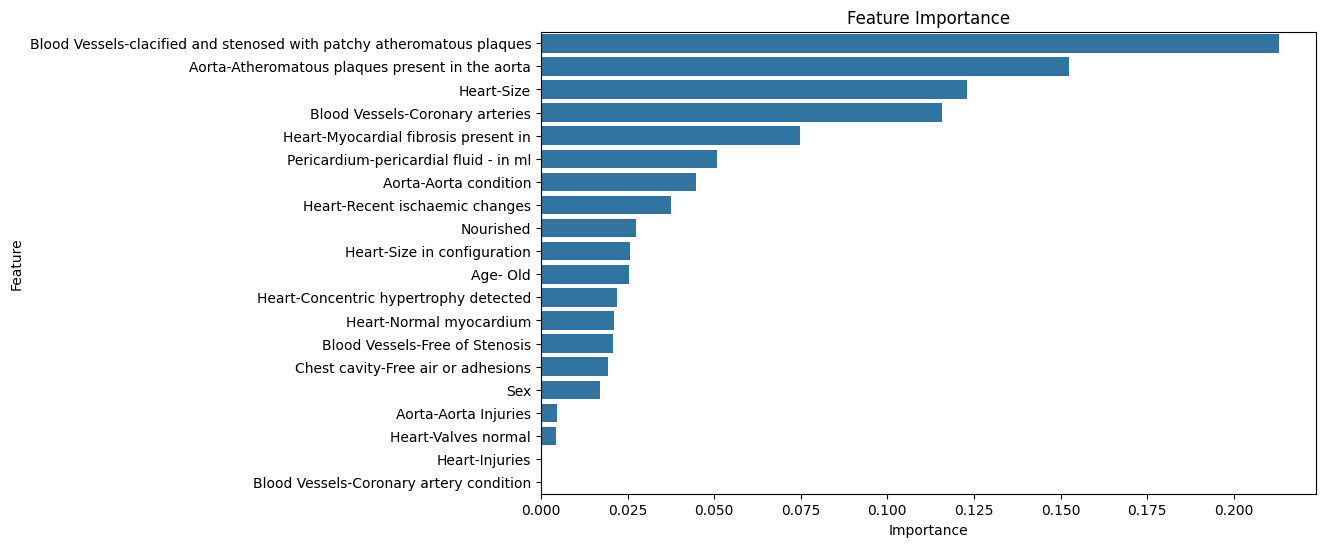


Feature Importance:
                                               Feature  Importance
16  Blood Vessels-clacified and stenosed with patc...    0.213046
19    Aorta-Atheromatous plaques present in the aorta    0.152459
5                                          Heart-Size    0.123025
13                    Blood Vessels-Coronary arteries    0.115786
10               Heart-Myocardial fibrosis present in    0.074803
4               Pericardium-pericardial fluid - in ml    0.050739
17                              Aorta-Aorta condition    0.044856
9                      Heart-Recent ischaemic changes    0.037420
1                                           Nourished    0.027341
6                         Heart-Size in configuration    0.025797
2                                            Age- Old    0.025315
11              Heart-Concentric hypertrophy detected    0.021842
8                             Heart-Normal myocardium    0.021164
14                     Blood Vessels-Free of Stenosis 

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X_reduced.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

print()

feature_importance = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

In [ ]:
cv_scores = cross_val_score(rf_classifier, X_reduced, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", cv_scores.mean()*100)

Cross-validation Accuracy: 85.82089552238806


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop features with high VIF
print(vif_data)


                                              feature        VIF
0                                                 Sex   3.523009
1                                           Nourished   7.744480
2                                            Age- Old  17.821503
3                  Chest cavity-Free air or adhesions   3.492734
4               Pericardium-pericardial fluid - in ml   1.086562
5                                          Heart-Size  24.647545
6                         Heart-Size in configuration   2.936743
7                                      Heart-Injuries   1.025740
8                             Heart-Normal myocardium   5.120987
9                      Heart-Recent ischaemic changes   2.502533
10               Heart-Myocardial fibrosis present in   2.360253
11              Heart-Concentric hypertrophy detected   3.005369
12                                Heart-Valves normal  53.748704
13                    Blood Vessels-Coronary arteries   4.280235
14                     Bl